# Recipe 5: Bias Mitigation
## Overview 

The previous recipes showed us how to develop an effective Trainee from a results perspective. We were able to find possible outlier Cases and edit our Trainee. However, there may a situation where data in our Trainee is technically correct but there are harmful or unnessary underlying trends and biases in that data. Howso Engine enables biases in data to be identified, understood, and mitigated. We encourage users to review the Howso Bias Mitigation Document for more information. 


## Recipe Goals:

This recipe will show how Howso Engine can provide organizations opportunities to identify data biases for a variety of use cases, empowering true, ethical data insights.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pmlb import fetch_data
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from howso.engine import Trainee
from howso.utilities import infer_feature_attributes

C:\Users\JacobBeel\AppData\Local\Temp\ipykernel_25652\2918535477.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Section 1: Train and Analyze


### 1. Load Data

Our example dataset for this recipe continues to be the well known `Adult` dataset. This dataset consists of 14 Context Features and 1 Action Feature. The Action Feature in this version of the `Adult` dataset has been renamed to `target` and it takes the form of a binary indicator for whether a person in the data makes over $50,000/year (*target*=1) or less (*target*=0).

In [2]:
# We use the full dataset in this Recipe
df = fetch_data('adult', local_cache_dir="data/adult")

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,1
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,0.0,0.0,13.0,39,1
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,0.0,0.0,40.0,39,1
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,0.0,0.0,40.0,39,1
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,0.0,0.0,40.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,4,215419.0,9,13.0,0,10,1,4,0,0.0,0.0,36.0,39,1
48838,64.0,0,321403.0,11,9.0,6,0,2,2,1,0.0,0.0,40.0,39,1
48839,38.0,4,374983.0,9,13.0,2,10,0,4,1,0.0,0.0,50.0,39,1
48840,44.0,4,83891.0,9,13.0,0,1,3,1,1,5455.0,0.0,40.0,39,1


### 2. Train Trainee

To highlight the possible bias, we filter our test dataset to control for features that likely have a major impact on the target, such as `workclass` and `education`. This is not necessarily something that is known beforehand, however through the use of techiniques like determining feature relevance, we can deduce which variables might be candidates to be controlled. This is only for demonstrative purposes and these features may not represent a complete set of confounding variables.

In [3]:
features = infer_feature_attributes(df)

# We use a train-test split so we can reduce bias in the test set
X_train, X_test = train_test_split(df, test_size=0.2)

t = Trainee(features=features, overwrite_existing=True)

t.train(X_train)

t.analyze()

# Now that the model is trained and analyzed, We try to control for confounding factors for this experiment.
X_test = X_test[(X_test.workclass == 4) & (X_test.education == 9) & (X_test["hours-per-week"] == 40)]

# Section 2: Explore Data for Bias



## 1. Potential Bias - Sex

There are many strategies for determining where to look for bias. These intricate relationships can be hard to disententangle and can be prone to unforeseen complications. Like many data analysis strategies, a combination of qualitative and quantitative knowledge can provide the user with the best course of action. Knowing the data helps keep humans in the loop and allows intelligent interpretation of the results. 

In our example dataset, `Adult`, it is a well-known phenomenon that women are often disadvantaged in the workforce in terms of salary, especially at the time this dataset was created. This gives us a starting point to look for harmful biases in our dataset.

### 1a. React

 We can begin by reacting to the Action Feature and plotting it.

In [4]:
context_features = features.get_names(without=['target'])
output = t.react(X_test, action_features=["target"], context_features=context_features)["action"]
predictions = output["target"]

### 1b. Plot

Plotting can help visualize the results.

c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

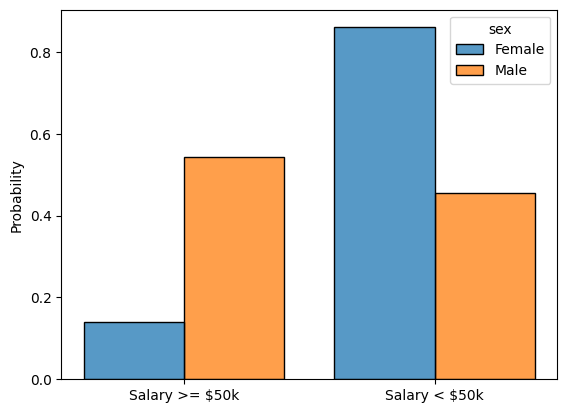

In [5]:
context_features = features.get_names(without=['target'])
output = t.react(X_test, action_features=["target"], context_features=context_features)["action"]
predictions = output["target"]

display_output_a = output.replace({"target": {0: "Salary >= $50k", 1: "Salary < $50k"}})
display_df = X_test.replace({
    "sex": {0: "Female", 1: "Male"},
    "target": {0: "Salary >= $50k", 1: "Salary < $50k"}
})
hue_order = ["Female", "Male"]

sns.histplot(
    x=display_output_a.target.values,
    multiple="dodge",
    stat="probability",
    common_norm=False,
    hue="sex",
    hue_order=hue_order,
    shrink=0.8,
    data=display_df
)

plt.show()

### 1c. Accuracy Results

In [6]:
accuracy = round(accuracy_score(X_test["target"], predictions), 3)
accuracy

0.839

### 1d. Results

Since we are controlling for many of the features that are relevant to the Action Feature, this highlights the potential biases in the remaining features. We can see with the imbalance in representation across target values between sexes, a bias is evident. Men, despite being of the same work class and education level are much more likely than women to make over $50K in this dataset. 


## 2. Potential Relationship with Biased Feature - Sex and Relationship

Now that we identified `Sex` as a bias, we want to see the extent of the bias as it relates to other features. This is important because if we want to correct a biased feature, its relationships with other features can leave residual biases that persist if not addressed. You can think of the main biased feature as a weed whose roots can spread to other features.

### 2a. Search

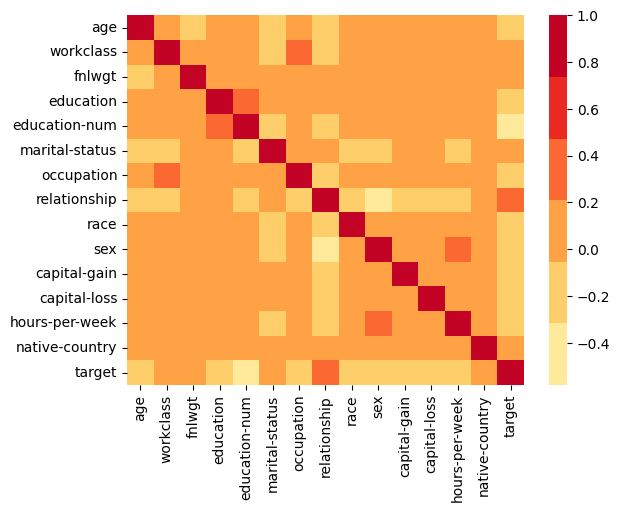

In [7]:
sns.heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns, cmap=sns.color_palette("YlOrRd"))

plt.show()



We can see that relationship is correlated with the target feature, while sex is strongly inversely correlated with both target and relationshp. 
Another possible relationship of note is that between age and target, which are inversely correlated with one another. Whether these features should be considered sources of bias is up to the user, as features such as sex have a strong argument and other features, such as age, may represent a neutral relationship in the data as people making higher salaries as they age seems to be a reasonable relationship. Nonetheless, we will demonstrate controlling for age as an example.



### 2b. React

In [20]:
context_features = features.get_names(without=['sex'])
react = t.react(X_test, action_features=["sex"], context_features=context_features, details={"feature_mda": True})

output = react["action"]
explanations = react["details"]

### 2c. Verify

To further unravel some of the relationships between biased features using Howso Engine's explanations, we can verify the entanglement of sex and relationship by predicting sex and calculating the mean decrease in accuracy (MDA).


**`Definitions`:**

**`MDA`:** The mean decrease in accuracy of removing a feature.  MDA units are on the same scale as the Action feature(s), and will be probabilities for categorical features.

**`Robust MDA`:** The mean absolute decrease in accuracy of the Action feature value(s) over a sampling of the power set of all of the Context features. This is similar to the sampling mechanism of the commonly used `SHAP` feature importance measure.

In [9]:

mdas = []
for explanation in explanations["feature_mda"]:
    mdas.append(list(explanation.values()))

mdas = pd.DataFrame(mdas, columns=list(explanation.keys()))
display(mdas.mean(axis=0).sort_values(ascending=False).round(5))

relationship      0.02962
marital-status    0.00985
target            0.00159
capital-gain      0.00143
hours-per-week    0.00081
fnlwgt            0.00060
capital-loss      0.00022
workclass         0.00019
education        -0.00053
race             -0.00110
age              -0.00126
native-country   -0.00188
education-num    -0.00207
occupation       -0.00440
dtype: float64

We can see that `relationship` has a large MDA, confirming that `relationship` and `sex` have a strong relationship. 

Now that we have identified some features which may introduce bias, we can begin to mitigate them in two different ways using Howso Engine. We will measure the effectiveness of this mitigation visually and with a G-test p-value.

## Section 3: Control for Differences in `relationship`, `sex`, and `marital-status`.

### 3a: React

In order to mitigate for these biased features, we will leave them out when using `react`. Note that since `marital-status` is correlated with `relationship`, we will also control for that. Since Howso Engine uses instance-based learning combined with sophisticated methods of handling NaNs, it can maintain high levels of performance even when features are left out.

In [10]:
context_features = features.get_names(without=['target', 'sex', 'relationship', 'marital-status'])
react = t.react(X_test, action_features=["target"], context_features=context_features)

output = react["action"]
predictions = output["target"]

### 3b. Plot

c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

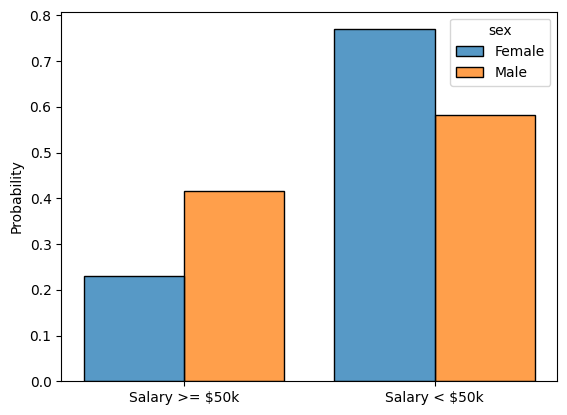

In [11]:

display_output_b = output.replace({"target": {0: "Salary >= $50k", 1: "Salary < $50k"}})
display_df = X_test.replace({
    "sex": {0: "Female", 1: "Male"},
    "target": {0: "Salary >= $50k", 1: "Salary < $50k"}
})

sns.histplot(
    x=display_output_b.target.values,
    multiple="dodge",
    stat="probability",
    common_norm=False,
    hue="sex",
    hue_order=hue_order,
    shrink=0.8,
    data=display_df
)

plt.show()

### 3c. Count check

We can see that the balance has been somewhat corrected, although this is not guaranteed. We can use a G-test to verify if this anecdote is backed up statistically by measuring the different counts. This may not be a complete fix, however it likely that the bias has improved.

In [12]:
counts = [
    [X_test.target.sum(), len(X_test) - X_test.target.sum()], [output.target.sum(), len(output) - output.target.sum()]
]

_, p, _, _ = chi2_contingency(counts, lambda_="log-likelihood")
print(f"p-value: {p}")

p-value: 1.0


### 3d. Accuracy Check

We can see that we still maintain relatively good accuracy compared to the original data set.

In [13]:
accuracy = round(accuracy_score(X_test["target"], predictions), 3)
accuracy

0.72

# 4. Control for Differences in Age

Unfortunately, it is possible that the balance not quite been addressed fully. Let's go back to that relationship between age and target, and see if we can't control for that. 

### 4a. Random Ages

We can do this by setting the age of each individual randomly in the range of 40 to 50. The Trainee will use these values to find the nearest trained Cases.

In [14]:
X_test_controlled = X_test

rng = np.random.default_rng()
X_test_controlled.age = rng.integers(40, 50, size=len(X_test_controlled))


### 4b. React

In [15]:

output = t.react(X_test_controlled, action_features=["target"], context_features=context_features)["action"]
predictions = output["target"]

### 4c. Graph

c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

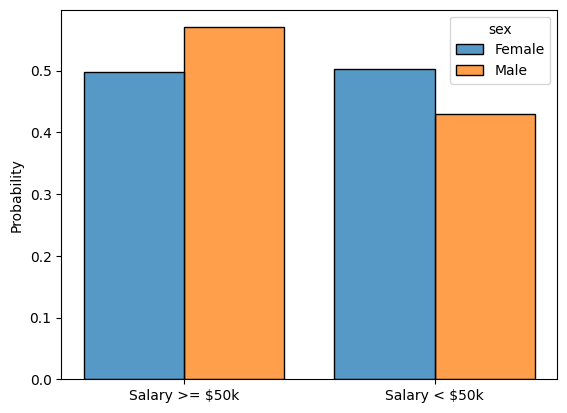

In [16]:
display_output_c = output.replace({"target": {0: "Salary >= $50k", 1: "Salary < $50k"}})
display_df = X_test.replace({
    "sex": {0: "Female", 1: "Male"},
    "target": {0: "Salary >= $50k", 1: "Salary < $50k"}
})

sns.histplot(
    x=display_output_c.target.values,
    multiple="dodge",
    stat="probability",
    common_norm=False,
    hue="sex",
    hue_order=hue_order,
    shrink=0.8,
    data=display_df
)

plt.show()

### 4c. Count Check
Anecdotally, this distribution is much more equitable than either of the previous distributions. How does it fare statistically?

In [17]:
counts = [
    [X_test.target.sum(), len(X_test) - X_test.target.sum()], [output.target.sum(), len(output) - output.target.sum()]
]

_, p_value, _, _ = chi2_contingency(counts, lambda_="log-likelihood")
print(f"p-value: {p_value}")

p-value: 3.4329056851102384e-09


As we can see, the p-value is below even very low significance levels, indicating that there is a strong statistical difference between the original, inequitable distribution and the new distribution. We can compare the three distributions visually.

### 4d. Accuracy Check

In [18]:
accuracy = round(accuracy_score(X_test["target"], predictions), 3)
accuracy

0.544

Unfortunately we can see that accuracy has dropped to a fairly low level. There is generally a trade off between accuracy and bias mitation, especially when testing is done in comparison to the original, biased data. The user must gauge this trade off carefully. At the same time, using only the accuracy score as the decision metric may paint an incomplete picture. For example, since the time in which our dataset, `Adult`, was created in 1996, there have been notable improvements in equality among sexes. Although not recommended, in a situation where we are using a dataset in 1996 to make inferences in present time, correcting for these biases may actually improve model performance on present test data as the bias is not as strong. These are all hypotheticals, but they illustrate the careful thought that must go into interpreting these results. 



# 5. Comparison

This graph is shown just to give a side by side comparison of the changes controlling for the various features. 


c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\JacobBeel\miniconda3\envs\engine-recipes-3.11\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

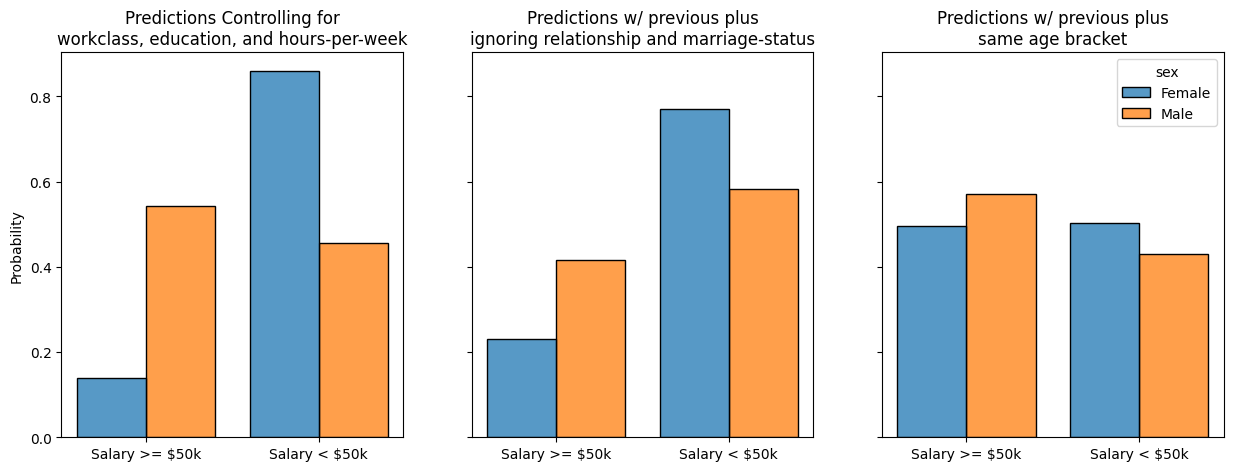

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

display_df = X_test.replace({
    "sex": {0: "Female", 1: "Male"},
    "target": {0: "Salary >= $50k", 1: "Salary < $50k"}
})

sns.histplot(
    x=display_output_a.target.values,
    multiple="dodge",
    stat="probability",
    common_norm=False,
    hue="sex",
    hue_order=hue_order,
    shrink=0.8,
    data=display_df,
    ax=axes[0],
    legend=False
)
axes[0].set_title("Predictions Controlling for\nworkclass, education, and hours-per-week")

sns.histplot(
    x=display_output_b.target.values,
    multiple="dodge",
    stat="probability",
    common_norm=False,
    hue="sex",
    hue_order=hue_order,
    shrink=0.8,
    data=display_df,
    ax=axes[1],
    legend=False
)
axes[1].set_title("Predictions w/ previous plus\nignoring relationship and marriage-status")

sns.histplot(
    x=display_output_c.target.values,
    multiple="dodge",
    stat="probability",
    common_norm=False,
    hue="sex",
    hue_order=hue_order,
    shrink=0.8,
    data=display_df,
    ax=axes[2]
)
axes[2].set_title("Predictions w/ previous plus\nsame age bracket")

plt.show()


# Conclusion and next steps

As shown, Howso Engine enables effective data exploration and bias mitigation on a single model with one train and analysis. This should not be done without ample consideration, as data bias is not always a straightforward phenomenon. We see that if we control for certain features, we were likely to improve the quality of our Trainee without grealy impacting the performance, while for other features, the performance impact may be too strong. This means we must be selective in what we adjust for, and in our example, adjusting for `Age` is most likely not recommended due to the performance and lack of intuition on its bias. 

This recipe is meant to show a useful, unique, and thought-provoking use case. It is also meant to start opening up the door of possibilities of using Howso Engine. There are countless other use cases that the user may wish to explore and we leave that up to the user to continue. We have one more recommended recipe, `6-validation.ipynb`, that will give an explanation and demonstration into some of the useful capabilities that arrise from instance-based modeling.